# 一、神经元是什么

人工神经网络里的神经元是什么，有什么用，只有弄清楚这个问题，你才知道你在哪里。在做什么。要往哪走。

首先看一下神经元的结构，看下图

![](./data/netuit.jpg)

我们先忽略激活函数不管：
- 输入： $X_{1},X_{2},\cdots ,X_{n}$  $\space\space\space\space$ (1.1)
- 输出：$y$                $\space\space\space\space$ (1.2)
- 输入和输出的关系（函数）：
 
 $$
  y = (X_{1}\times W_{1} +X_{2}\times W_{2} + \cdots +X_{n}\times W_{n}) + 
  b \space\space\space\space（1.3）$$
 
其中，$W_{i}$,$i=1$,$n$为权重（weight）,待会就知道权重为何物
    
 
 因为我们的数据都是离散的，为了看的更清楚，我们换个表达式把数据以向量的形式表示出来：
 - 改写输入：
     $$
         X=[X_{1},X_{2},\cdots,X_{n}]^T  ，X看成n维的向量 \space\space\space\space  (1.4)
         $$ 
      
 - 改写权重：
$$
W =\begin{bmatrix}W_{1} & W_{2}&\cdots &W_{n}\end{bmatrix}，W看成是一行n列的矩阵  \space\space\space\space(1.5)
$$
 - 改写y:
$$
y = \begin{bmatrix}W_{1} & W_{2}&\cdots &W_{n}\end{bmatrix} \cdot  \begin{bmatrix}X_{1}\\X_{2}\\\vdots\\X_{n}\end{bmatrix} + b 
\space\space\space\space(1.6) $$,这不就是线性回归模型吗？可以看到$W$就是斜率啊

现在回答刚才的问题：
- 一个神经元是什么：参照式（1.6），从函数图像角度看，这就是一条直线。
- 一个神经元有什么作用：要说明用途就要给出一个应用场景：分类。一个神经元就是一条直线，此时它就是个分类器。所以在线性场景下，
单个神经元能达到分类的作用，它总能学习到一条合适的直线，将两类元素区分出来。看图说话 http://t.cn/RBCoWof
如下图：

![bp2](./data/BP2.png)

对上图简要说明：
我们需要对神经元的输出做判定，那么就需要判定规则，通过判定规则后我们才能拿到我们想要的结果，这个规则是：

1、假设，0代表红点，1代表蓝点（这些数据都是事先标定好的，在监督学习下，神经元会知道点是什么颜色并以这个已知结果作为标杆进行学习）
2、当神经元输出小于等于0时，最终结果输出为0，这是个红点
3、当神经元输出大于1时，最终结果输出为1，这是个蓝点。

上面的规则有点激活函数的味道（这里只是线性场景，虽然不适合，但是简单起见，使用了单位跃阶函数来描述激活函数的功能）当x<=0时，y=0,当x>0时，y=1）
单位跃阶函数：
![bp02](./data/bp02.jpg)
此时神经元的长相：
![bp03](./data/bp03.jpg)

# 二、激活函数是什么，有什么用

从上面的例子，其实已经说明了激活函数的作用（线性模型的表达能力不够，引入激活函数是为了添加非线性因素），但是我们通常面临的问题，不是简单的线性问题，不能用单位跃阶函数作为激活函数，原因是
跃阶函数在x=0时不连续，即不可导，在非0处导数为0，（说人话）就是它具备输出限定在$[0-1]$,但是它不具备丝滑的特性，这个特性很重要。并且在非0处导数为0，
也就是硬饱和，压根儿就没有梯度可言，梯度也很重要，梯度意味着在神经元传播间是由反应的，而不是“死了的”。

 那激活函数需要具备什么特性呢：
- 非线性：即导数不是常熟，不然就退化成直线，对于一些画一条直线仍然无法分开的问题，非线性可以把直线掰弯，自从掰弯，自从变弯以后就保罗万象了。
- 几乎处处可导： 也就是具备“丝滑的特性”,数学上处处可导为后面讲到的BP提供了核心条件
- 输出范围有限：一般是限定在[0,1]有限的输出范围使得神经元对于一些比较大的输入也会比较稳定。
- 非饱和性：饱和就是指，当输入比较大的时候，几乎没变化了，那么会导致梯度消失！什么是梯度消失：就是输出慢慢的没有变化了。梯度消失带来的负面影响就是限制了神经网络表达能力，词穷的感觉你有么。sigmod,tanh函数都是软饱和的，跃阶函数是硬饱和的。软饱和是指输入趋于无穷大的时候输出无限接近上限，硬是指像跃阶函数那样，输入非0输出就已经始终都是上限值。
如果激活函数是饱和的，带来的缺陷就是系统迭代更新变慢，系统收敛就慢，当然这是可以有办法弥补的，一种方法就是使用交叉熵函数作为损失函数，Relu是非饱和的，亲测效果挺不错
- 单调性：即导数符号不变，导数要么一直大于0，要么一直小于0，不要上窜下跳。导数符号不变，让神经网络训练容易收敛。

- 更多参考[04-激活函数](04-激活函数.ipynb)

这里我们将用到的激活函数：
Sigmod函数：$y = \frac{1}{1+e^{-x}}   \space\space\space\space  (2.1)$    

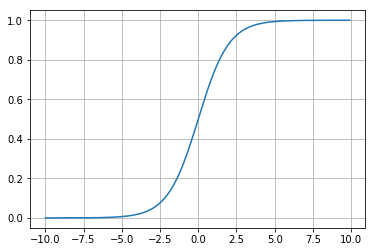

In [38]:

%matplotlib inline
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
import matplotlib.pyplot as plt
x = np.arange(-10,10,0.1)
y = [sigmoid(i) for i in x]
plt.figure()
plt.plot(x,y)
plt.grid(True)
plt.show()

对Sigmod函数求导（后面会用到）：
首先要了解复合函数的求导：
- 法则1：$[u(x) \pm v(x)] = u(x) \pm v(x)  \space\space\space\space  (2.2)$             
- 法则2：$[u(x)  \ast v(x)] = u^{'}(x)  \ast v(x) +u(x)  \ast v^{'}(x)\space\space\space\space  (2.3)$
- 法则3：$\frac{u}{v}^{'} = \frac{u^{'}v-uv^{'}}{v^{2}}\space\space\space\space  (2.4)$ 

开始对Sigmoid求导：

$$\begin{aligned}
y =& \left(\frac{1}{1+\space e^{-x}}^{'}\right)\\
=&\left(\frac{u}{v}^{'}\right)  \space\space\space\space  (设u=1,v = 1+e^{-x})\\
=&\frac{u^{'}v-uv^{'}}{v^{2}}\\
=&\frac{1^{'} \ast (e^{-x} \space + \space 1)\space-1 \ast (e^{-x}\space + \space 1)^{'}}{(e^{-x} \space + \space 1)^{2}}\\
=&\frac{e^{-x}}{(e^{-x} \space + \space 1)^{2}}\\
=&\frac{1}{(e^{-x} \space + \space 1)} \ast \frac{e^{-x}\space+\space1-\space 1}{(e^{-x} \space + \space 1)}\\
=&\frac{1}{(e^{-x} \space + \space 1)} \ast \left(1- \frac{1}{(e^{-x} \space + \space 1)}\right)\\
=&y \ast (1-y)\end{aligned}    \space \space \space \space (2.5)$$
 

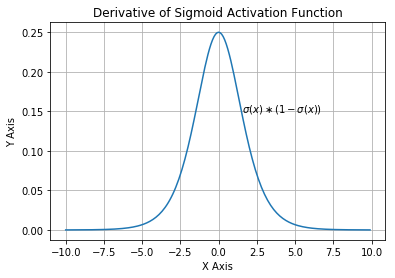

In [39]:
#导数图像为：
%matplotlib inline
import numpy as np
def gety(x):
    return np.exp(-x)/np.power((1+np.exp(-x)),2)
import matplotlib.pyplot as plt
x = np.arange(-10,10,0.1)
y = [gety(i) for i in x]
plt.figure()
plt.plot(x,y)
plt.ylabel('Y Axis')
plt.xlabel('X Axis')
plt.title("Derivative of Sigmoid Activation Function")
plt.text(1.5,0.15,r'$\sigma(x) \ast (1-\sigma(x))$')
plt.grid(True)
plt.show()

# 三、BP（Back Progagation）算法

### 1.神经元的结构

经过上面的介绍，我们知道单个神经元只能处理线性可分情况，唯有多个神经元组成的网络才能处理更复杂的问题。神经网络是一种分层结构，一般
由输入层、隐藏层，输出层组成，所以神经网络至少有3层，隐藏层多于1，总层数大于3的就是我们所说的深度学习。
- 输入层：就是接收原始数据，然后往隐藏层送
- 输出层：神经网络的决策输出
- 隐藏层：该层是神经网络的关键，相当于对数据做一次特征提取，隐藏层的意义是把前一层的向量变成新的向量，就是坐标变换通过$ \alpha(W.\overrightarrow{x}+b)$把数据做平移、旋转、伸缩、扭曲 [参考02-why-Deep](02-why-Deep.ipynb)，这样让数据变得线性可分。
可以说：神经网络换着坐标空间玩数据，根据需要，可降维，可升维，可大，可小，可圆，可扁，就是这么“无敌”
这个可以自己玩玩，直观的感受一下：[传送门](https://cs.stanford.edu/people/karpathy/convnetjs//demo/classify2d.html)

### 2.正向传播过程
看图，这是一个典型的三层神经网络结构，第一层是输入层，第二层是隐藏层，第三层是输出层。PS:不同的应用场景，神经网络的结构要有针对性的设计，这里仅仅是为了推导算法和计算方便才采用这个简单的结构
![0404](./data/04-04.jpg)

我们以战士打靶，目标是训练战士能命中靶心成为神枪手作为场景：
那么我们手里有这样一些数据：一堆枪摆放的位置(x,y)，以及射击结果，命中靶心和不命中靶心。
- 我们的目标是：训练出一个神经网络模型，输入一个点的坐标（射击姿势），它就告诉你这个点是什么结果（是否命中）。-
- 我们的方法是：训练一个能根据误差不断自我调整的模型，训练模型的步骤是：

 - 正向传播：把点的坐标数据输入神经网络，然后开始一层一层的传播下去，直到输出层输出结果。
 - 反向传播(BP)：就好比战士去靶场打靶，枪的摆放位置（输入），和靶心（期望的输出）是已知。战士（神经网络）一开始的时候是这样做的，
 随便开一枪$（w，b参数初始化称随机值,这个场景中我们把w,b当做影响射击的因素的估计，反向传播过程也就是不断
 的在更新w,b，以达到误差最小）$，观察结果（这时候相当于进行了一次正向传播）。然后发现，偏离靶心左边，应该往右点儿打。所以战士开始
 根据偏离靶心的距离（误差，也称损失）调整了射击方向往右一点（这时，完成了一次反向传播）当完成了一次正反向传播，也就完成了一次神经
 网络的训练迭代，反复调整射击角度（反复迭代），误差越来越小，战士打得越来越准，神枪手模型也就诞生了

### 3.BP算法推导和计算

- 参数初始化：
    
    - 输入：$i_{1} = 0.1,i_{2} = 0.2$
    - 输出：$O_{1} = 0.01,O_{2} = 0.99$ 相当于标定了
    - 权重：$w_{1} = 0.1,w_{2} = 0.2, w_{3} = 0.3, w_{4} = 0.4\\
          w_{5} = 0.5,w_{6} = 0.6,w_{7} = 0.7,w_{8} = 0.8$
    - 扁置：$b_{1} = 0.55,b_{2} = 0.56,b_{3} = 0.66,b_{4} = 0.67$
          
- 正向传播：
    - 计算隐层神经元$h_{1}$输入加权和：
        $$\begin{aligned}
        in_{h_{1}}=&w_{1} \ast i_{1} + w_{2} \ast i_{2} + 1 \ast b_{1}\space\space\space\space\space (3.1) \\
            =& 0.1 \ast 0.1 + 0.2 \ast 0.2 + 1 \ast 0.55 \\
            =& 0.6\\
           \end{aligned}
        $$
    - 计算隐层神经网络$h_{1}$的输出，需要通过激活函数Sigmoid：
        $$
        \begin{aligned}
        out_{h_{1}}=& \frac{1}{e^{-in_{h_{1}}}+1}      \space\space\space\space\space (3.2)\\
                    =&\frac{1}{e^{0.6}+1} \\
                    =&0.6456563062\end{aligned}
        $$
    - 同理，计算出$h_{2}$的输出：
         $$
        out_{h_{2}}= 0.6592603884
         $$
- 隐层-->输出层：
    - 计算输出层神经元$O_{1}$的输入加权和：
        $$
        \begin{aligned}
        in_{O1}=& w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3} \space\space\space\space\space (3.3)\\
                        =&0.5 \ast 0.6456563062 + 0.6 \ast 0.6592603884 \\
                        =& 1.3783843861\end{aligned}
        $$
    - 计算隐层$O_{1}$的输出：
        $$
        \begin{aligned}
        out_{O1}= &\frac{1}{e^{-in_{O_{1}}}+1}      \space\space\space\space\space (3.4)\\
                        =&\frac{1}{e^{1.3783843861}+1} \\
                        =&0.7987314002
        \end{aligned}
        $$
    - 同理，计算隐层神经元$O_{2}$的输出：
        $$
        out_{O_{2}}= 0.8374488853
        $$
        
    正向传播结束，我们看看输出层的结果[0.7987314002,0.8374488853],但是我们希望它能输出[0.01,0.99],所以误差相差很大，这个时候我们就需要利用反向传播更新权值w，然后重新计算输出：
- 反向传播：
    - 1.计算输出误差：
    $$
       \begin{aligned}
       E_{total} =& \sum_{i=1}^{\space2}E_{out_{O_{\space i}}} \space\space\space\space\space (3.5)\\
       =&E_{out_{O_{\space 1}}} + E_{out_{O_{\space2}}}\\
       =&\frac{1}{2}\left(O_{1}-out_{O_{\space 1}} \right)^2+\frac{1}{2}\left(O_{2}-out_{O_{\space 2}} \right)^2\\
       =&\frac{1}{2}\left(0.01-0.7987314002 \right)^2+\frac{1}{2}\left(0.99-0.8374488853 \right)^2\\
       =&0.0116359213+0.3110486109\\
       =&0.3226845322\\
       \\
       &\textrm{其中}{ E_{out_{O_{\space 1}}}= 0.0116359213 ,E_{out_{O_{\space 2}}}= 0.3110486109}
       \end{aligned}
       $$
       
         注意：这里用平方和损失作为误差的计算，是因为它简单，实际上用的时候效果不咋滴，如果激活函数是饱和的，带来的缺陷就是系统迭代更新更慢，系统收敛就慢，当然这可以通过交叉熵函数作为损失函数来弥补，交叉熵作为代价函数在计算误差对输入的梯度时，抵消了激活函数的导数项，神奇的避免了因为激活函数的“饱和性”给系统带来的负面影响. [传送门](05-BP神经网络-二次代价到交叉熵代价.ipynb)

            交叉熵：

        $$
        \begin{aligned}
         E_{total} = &-\frac{1}{m}\sum_{i=1}^{m}\left(O\cdot log(out_{O})+(1-O)\cdot log(1- out_{O})\right)\\
        \frac{\partial out_{O}}{\partial out_{in_{O}}} =& out_{O}(1-out_{O})
        \end{aligned}$$

            对输出的偏导数：
         $$
            \begin{aligned}
                \frac{\partial E_{total}}{\partial out_{O}} = &-\frac{1}{m}\sum_{i=1}^{m}\left(\frac{O}{out_{O}} - \frac{1-O}{1- Out_{O}}\right)\frac{\partial out_{O}}{\partial out_{in_{O}}}\\
            =&-\frac{1}{m}\sum_{i=1}^{m}\left(\frac{O}{out_{O}} - \frac{1-O}{1-Out_{O}}\right)out_{O}(1-out_{O}) \\
            =& -\frac{1}{m}\sum_{i=1}^{m}\left(O-out_{O}\right)
            \end{aligned}
         $$
      
    - 2.隐层-->输出层的权值及偏置b的更新：
      
    - 先给出链式求导法则：
              
               假设y是u的函数，而u是x的函数：y = f(u),u = g(x)
               
               对应的复合函数就是：y = f(g(x))
               
               那么y对x的导数则有： 
         $$            
               \frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}
         $$ 
    - 以更新w5为例：
            as we know ,全值w的大小能直接影响输出，w不合适那么会使得输出误差。要想知道某一个w值对误差影响的程度，可以用误差对该w的变化率来表达，如果w的一点点变动，就会导致误差增大很多，说明这个w对误差影响的程度就更大，也就是说，误差对该w的变化率越高。而误差对w的变化率就是误差对w的偏导。看下图，总误差的大小首先受输出神经元O1的输出影响，继续反推，O1的输出受它自己的输入影响，而输入又收到w5的影响。这就是链式反应，从结果反推根因。
 ![04-05.jpg](./data/04-05.jpg)
       那么根据链式法则则有：
         $$
                \frac{\partial E_{total}}{\partial W_{5}} = \frac{\partial E_{total}}{\partial out_{O1}}\cdot \frac{\partial out_{O1}}{\partial in_{O1}}\cdot \frac{\partial in_{O1}}{\partial W_{5}}           \space\space\space\space (3.6)
         $$


     现在开始逐个计算：
$$
\begin{aligned}
\because  E_{total} =& \sum_{i=1}^{\space2}E_{out_{O_{\space i}}} \space\space\space\space\space (3.7)\\
=&E_{out_{O_{\space 1}}} + E_{out_{O_{\space2}}}\\
=&\frac{1}{2}\left(O_{1}-out_{O_{\space 1}} \right)^2+\frac{1}{2}\left(O_{2}-out_{O_{\space 2}} \right)^2\\
\therefore\frac{\partial E_{total}}{\partial out_{O1}} = &\frac{\frac{1}{2}\left(O_{1}-out_{O_{\space 1}} \right)^2+\frac{1}{2}\left(O_{2}-out_{O_{\space 2}} \right)^2}{\partial out_{O1}}  \space\space\space\space (2.7) \\
=&2\cdot\frac{1}{2}(O_{1} - out_{O1})^{2-1}\cdot (0-1) +0\\
=&-(O_{1} - out_{O1}) \space\space\space\space (3.8)\\
=&-(0.01-0.7987314002)\\
=&0.7887314002
\end{aligned}
$$

 $$
        \begin{aligned}
        \because out_{O1}= &\frac{1}{e^{-in_{O_{1}}}+1}      \space\space\space\space\space (3.9)\\
        \therefore \frac{\partial out_{O1}}{\partial in_{O1}}= &\frac{\partial \frac{1}{e^{\space -in_{\space O_{1}}\space}\space+\space1}}{\partial in_{O1}}  \\  
        =&out_{O1}(1-out_{O1}) \space\space\space\space\space (3.10)\\
        =&0.7987314002 \cdot(1-0.7987314002)\\
        =&0.1607595505
        \end{aligned}
$$

 $$
        \begin{aligned}
        \because   in_{O1}=& w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3} \space\space\space\space\space (3.11)\\
        \therefore  \frac{\partial in_{O1}}{\partial W_{5}} \\= &\frac{\partial {w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3}}}{\partial w_{5}}  \space\space\space\space\space (3.12)\\
         =&1\cdot w_{5}^{1-1} \cdot out_{h1} + 0 + 0\\
         =&out_{h1}\\
         =&0.6456563062
        \end{aligned}
$$

 $$
        \begin{aligned}
        \therefore \frac{\partial E_{total}}{\partial W_{5}} =& \frac{\partial E_{total}}{\partial out_{O1}}\cdot \frac{\partial out_{O1}}{\partial in_{O1}}\cdot \frac{\partial in_{O1}}{\partial W_{5}}  \space\space\space\space\space (3.13)\\
        =&0.7887314002\cdot 0.1607595505 \cdot 0.6456563062\\
        =&0.0818667051
        \end{aligned}
$$

    对w求偏导公式可以归纳为：
 
$$
        \begin{aligned}
        \therefore \frac{\partial E_{total}}{\partial W_{5}} =& \frac{\partial E_{total}}{\partial out_{O1}}\cdot \frac{\partial out_{O1}}{\partial in_{O1}}\cdot \frac{\partial in_{O1}}{\partial W_{5}}  \space\space\space\space\space (3.13)\\
        =&(-(O_{1} - out_{O1})) \cdot out_{O1}\cdot(1-out_{O1}) \cdot out_{h1}\\
        =&\sigma_{O_{1}}\cdot out_{h1}\\
        \textrm{其中,}\sigma_{O_{1}}=& (-(O_{1} - out_{O1})) \cdot out_{O1}\cdot(1-out_{O1}) 
        \end{aligned}
$$

   同理，对b求偏导公式可以归纳为：
$$
        \begin{aligned}
        \because   in_{O1}=& w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3} \space\space\space\space\space (3.14)\\
        \therefore \frac{\partial in_{O1}}{\partial  b_{3}}=&\frac{\partial {w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3}}}{\partial  b_{3}}  \space\space\space\space\space (3.15)\\
        =&0+0+b_{3}^{1-1}\\
        =&1
        \end{aligned}
$$

$$
        \begin{aligned}
        \therefore \frac{\partial E_{total}}{\partial  b_{3}} =& \frac{\partial E_{total}}{\partial out_{O1}}\cdot \frac{\partial out_{O1}}{\partial in_{O1}}\cdot \frac{\partial in_{O1}}{\partial  b_{3}}  \space\space\space\space\space (3.16)\\
        =&(-(O_{1} - out_{O1})) \cdot out_{O1}\cdot(1-out_{O1}) \cdot 1\\
        =&\sigma_{O_{1}}\\
        \textrm{其中,}\sigma_{O_{1}}=& (-(O_{1} - out_{O1})) \cdot out_{O1}\cdot(1-out_{O1}) 
        \end{aligned}
$$

更新w5值之前还需要初始化一个学习率，关于学习率，不能过高也不能过低，因为训练神经网络系统的过程，就是通过不断的迭代，找到让系统
输出误差最小的参数的过程。每一次迭代都经过反向传播进行梯度下降。学习率太小，容易陷入局部最优。学习率太高，系统可能无法收敛，
会在一个地方上窜下跳。

顺带提一句，神经网络的目标是通过更新w，b的值来实现误差最小，因此顺着w,b的梯度的反方向，下降的最快。

现在开始更新w5的值，就设定学习率为0.5吧：
$$
\begin{aligned}
w_{5}^{+} =& w_{5} - \alpha \cdot \frac{\partial E_{total}}{\partial w_{5}} \space\space\space\space (3.17)\\
=&0.5 - 0.5 \cdot 0.0818667051 \\
=&0.45906664745
\end{aligned}
$$

归纳输出层w更新的公式：

$$
\begin{aligned}
w_{O}^{+} =&w_{O} - \alpha \cdot(-(O - out_{O})) \cdot out_{O}\cdot(1-out_{O}) \cdot out_{h} \space\space\space\space (3.18)\\
=&w_{O} + \alpha \cdot(O - out_{O})\cdot out_{O}\cdot(1-out_{O}) \cdot out_{h}
\end{aligned}
$$

同理可以计算$w_{6},w_{7},w_{8}$的更新值。
        
同理更新偏置b：
$$
\begin{aligned}
b^{+} =& b _{O}- \alpha \cdot \frac{\partial E_{total}}{\partial b_{O}} \space\space\space\space (3.19)\\
=&b_{O}- \alpha \cdot(-(O_{1} - out_{O1})) \cdot out_{O1}\cdot(1-out_{O1}) \\
=&b_{O}+ \alpha \cdot(O_{1} - out_{O1}) \cdot out_{O1}\cdot(1-out_{O1})
\end{aligned}
$$

 - 3.输入层-->隐层的全值及偏置b更新：
    - 3.1以更新w1为例：
        ![04-06.jpg](./data/04-06.jpg)
        从上图中可以看出，我们在求$w_{5}$的更新时，误差反向传递路径为：输出层->隐层，即 $out_{O1}-->in_{O1}-->w_{5}$,总误差只有一条路径能传回来。但是在求$w_{1}$时，误差反向传递路径是：隐藏层-->输入层，但是隐藏层的神经元是有2根线的，所以总误差沿着2个路径回来，也就是说，计算偏导时，要分开计算。
     总误差对$w_{1}$的偏导：
     $$
     \begin{aligned}
     \frac{\partial E_total}{w_{1}} = &\frac{\partial E_total}{\partial Out_{h1}}\cdot\frac{\partial out_{h1}}{\partial in_{h1}}\cdot\frac{\partial in_{h1}}{w_{1}} \space\space\space\space (3.20) \\
     =&(\frac{\partial E_{O1}}{\partial Out_{h1}}+\frac{\partial E_{O2}}{\partial Out_{h1}})\cdot\frac{\partial out_{h1}}{\partial in_{h1}}\cdot\frac{\partial in_{h1}}{w_{1}}\space\space\space\space (3.21) \\
     \end{aligned}
     $$



   - 3.2先算：
$$\begin{aligned}
\frac{\partial E_total}{\partial Out_{h1}} = \frac{\partial E_{O1}}{\partial Out_{h1}}+\frac{\partial E_{O2}}{\partial Out_{h1}}\space\space\space\space (3.22) \\
\end{aligned}\\
$$
    
    挨个算： 
$$\begin{aligned}
\frac{\partial E_{O1}}{\partial Out_{h1}} = \frac{\partial E_{O1}}{\partial in_{O1}}\cdot\frac{\partial in_{O1}}{\partial out_{h1}}\space\space\space\space (3.23) \\
\end{aligned}
$$


      计算左边部分, 参考3.6,3.7,3.8：
$$\begin{aligned}
        \frac{\partial E_{O1}}{\partial in_{O1}} = &\frac{\partial E_{O1}}{\partial out_{O1}}\cdot \frac{\partial out_{O1}}{\partial in_{O1}}           \space\space\space\space (3.24)\\
        =&\frac{\partial\frac{1}{2}\left(O_{1}-out_{O_{\space 1}} \right)^2}{\partial out_{O1}}\cdot\frac{\partial out_{O1}}{\partial in_{O1}}\\
        =&-(O_{1} - out_{O1}) \cdot \frac{\partial out_{O1}}{\partial in_{O1}}\\
        =&0.7987314002 \cdot 0.16075955505\\
        =&0.1284037009
 \end{aligned}
$$

 计算右边部分：
$$
\begin{aligned}
\because   in_{O1}=& w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3} \space\space\space\space\space (3.25)\\
\therefore \frac{\partial in_{O1}}{\partial  out_{h1}}=&\frac{\partial {w_{5} \ast Out_{h_{1}} + w_{6} \ast Out_{h_{2}} + 1 \ast b_{3}}}{\partial out_{h1}}  \space\space\space\space\space (3.26)\\
=&w_{5} \cdot out_{h1}^{1-1} + 0 + 0\\
=&w_{5}   \space\space\space\space\space (3.27)\\
=&0.5
\end{aligned}
$$

 $$\begin{aligned}
\therefore \frac{\partial E_{O1}}{\partial Out_{h1}} = &\frac{\partial E_{O1}}{\partial in_{O1}}\cdot\frac{\partial in_{O1}}{\partial out_{h1}}\space\space\space\space (3.28) \\
=&0.0.1284037009 \cdot 0.5 \\
=&0.06420185045
\end{aligned}
 $$



    同理：
  $$\begin{aligned}
        \therefore \frac{\partial E_{O2}}{\partial Out_{h1}} = &\frac{\partial E_{O2}}{\partial in_{O2}}\cdot\frac{\partial in_{O2}}{\partial out_{h1}}\space\space\space\space (3.29) \\
        =&-(O_{2} - out_{O2}) \cdot \frac{\partial out_{O2}}{\partial in_{O2}}\cdot \frac{in_{O2}}{out_{h1}}\\
        =&-(O_{2} - out_{O2}) \cdot out_{O2}(1-out_{O2})\cdot w_{7}\\
        =&-(0.99-0.8374488853)\cdot 0.8374488853 \cdot (1-0.8374488853)\cdot 0.7\\
        =&-0.0145365614
  \end{aligned}
  $$

     所以：
 $$\begin{aligned}
        \frac{\partial E_total}{\partial Out_{h1}} = &\frac{\partial E_{O1}}{\partial Out_{h1}}+\frac{\partial E_{O2}}{\partial Out_{h1}}\space\space\space\space (3.30) \\
        =&0.06420185045+(-0.0145365614)\\
        =&0.04966528905
        \end{aligned}
 $$

  - 3.2 然后算：
  $
  \frac{\partial out_{h1}}{\partial in_{h1}}
  $
  $$
        \begin{aligned}
        \because out_{h1}= &\frac{1}{e^{-in_{h_{1}}}+1}      \space\space\space\space\space (3.31)\\
        \therefore \frac{\partial out_{h1}}{\partial in_{h1}}= &\frac{\partial \frac{1}{e^{\space -in_{\space O_{1}}\space}\space+\space1}}{\partial in_{h1}}  \\  
        =&out_{h1}(1-out_{h1}) \space\space\space\space\space (3.32)\\
        =&0.06456563062 \cdot(1-0.06456563062)\\
        =&0.2287842405
        \end{aligned}
$$

- 3.3 最后算： 
 $$
 \begin{aligned}\frac{\partial in_{h1}}{w_{1}}=&\frac{\partial(w_{1} \cdot i_{1} + w_{2} \cdot i_{2} )}{\partial w_{1}}\\
 =&w_{1}^{1-1} \cdot i_{1} + 0 +0 \\
 =&i_{1}\\
 =&0.1
  \end{aligned}
 $$

 - 3.4 最后，将3者相乘：
  $$
 \begin{aligned}
 \frac{\partial E_total}{w_{1}} = &\frac{\partial E_total}{\partial Out_{h1}}\cdot\frac{\partial out_{h1}}{\partial in_{h1}}\cdot\frac{\partial in_{h1}}{w_{1}} \space\space\space\space (3.20) \\
 =&(\frac{\partial E_{O1}}{\partial Out_{h1}}+\frac{\partial E_{O2}}{\partial Out_{h1}})\cdot\frac{\partial out_{h1}}{\partial in_{h1}}\cdot\frac{\partial in_{h1}}{w_{1}}\space\space\space\space (3.21) \\
 =&0.04966528905 \cdot 0.2287842405 \cdot 0.1\\
 =&0.0011362635
 \end{aligned}
 $$

我们归纳一下式子：
$$
\begin{aligned}
\frac{\partial E_total}{w_{1}} = &\frac{\partial E_total}{\partial Out_{h1}}\cdot\frac{\partial out_{h1}}{\partial in_{h1}}\cdot\frac{\partial in_{h1}}{w_{1}}   \\
=&(\frac{\partial E_{O1}}{\partial Out_{h1}}+\frac{\partial E_{O2}}{\partial Out_{h1}})\cdot\frac{\partial out_{h1}}{\partial in_{h1}}\cdot\frac{\partial in_{h1}}{w_{1}}\\
=&(\sum_{O}^{}\frac{\partial E_{O}}{\partial out_{O}}\cdot\frac{\partial out_{O}}{\partial in_{O}}\cdot\frac{\partial in_{O}}{\partial out_{h}})\cdot\frac{\partial out_{h1}}{\partial in_{h1}}\cdot\frac{\partial in_{h1}}{w_{1}}\space\space\space\space\space (3.33)\\\\ 
=&(\sum_{O}\sigma_{O}W_{O})\cdot out_{h1}(1-out_{h1})\cdot i_{1} \space\space\space\space\space (3.33)\\
=&\sigma_{h1} \cdot i_{1}\\
\end{aligned}
$$

其中，$\sigma_{h1} = (\sum_{O}\sigma_{O}W_{O})\cdot out_{h1}(1-out_{h1})$

$\sigma_{O}$看做输出层的误差量，然后该误差量和$W$相乘，相当于通过w传播了过来，如果是深层网络，
隐藏层数量>1，那么公式中的$\sigma_{O}$写成$\sigma_{h}$,$W_{O}$写成$W_{h}$

 终于，可以更新$W1$的值了：
    $$\begin{aligned}
    W_{1}^{+} = &W_{1} - \alpha \cdot \frac{\partial E_{total}}{\partial W_{1}}\\
    =&0.1-0.1 \cdot 0.0011362635\\
    =&0.0998863737
    \end{aligned}
    $$

归纳一下，隐藏层$W$的更新的公式：

$$\begin{aligned}
W_{h}^{+} =&W_{h} - \alpha \cdot \frac{\partial E_{total}}{\partial W}\\
=&W_{h} + \alpha \cdot (-\sum_{O}\sigma_{O}W_{O})\cdot out_{h1}(1-out_{h})\cdot i   \space\space\space\space (3.34)
\end{aligned}
$$

如果隐藏层数量>1:
$$\begin{aligned}
W_{h}^{+} =&W_{h} - \alpha \cdot \frac{\partial E_{total}}{\partial W}\\
=&W_{h} + \alpha \cdot (-\sum_{hh}\sigma_{hh}W_{hh})\cdot out_{h1}(1-out_{h})\cdot in_{h}    \space\space\space\space (3.35)
\end{aligned}
$$

    hh代表当前隐藏层的下一个隐藏层（-->正向），深层网络，计算的式子就是递归计算，同理，可以计算出W2,W3,W4的更新值。

同理隐藏层偏置b的更新：
$$\begin{aligned}
 \frac{\partial E_{total}}{\partial b_{h}}=&(\sum_{h}\sigma_{h}W_{h})\cdot out_{h}(1-out_{h})  \space\space\space\space (3.36)
\end{aligned}
$$   
    
$$\begin{aligned}
b_{h}^{+} =&b_{h} - \alpha \cdot \frac{\partial E_{total}}{\partial b_{h}}\\
=&b_{h} + \alpha \cdot (-\sum_{h}\sigma_{h}W_{h})\cdot out_{h}(1-out_{h})  \space\space\space\space (3.37)
\end{aligned}
$$

如果隐藏层数量>1:
$$\begin{aligned}
b_{h}^{+} =&b_{h} - \alpha \cdot \frac{\partial E_{total}}{\partial b_{h}}\\
=&b_{h} + \alpha \cdot (-\sum_{hh}\sigma_{hh}W_{hh})\cdot out_{h}(1-out_{h})  \space\space\space\space (3.38)
\end{aligned}
$$

hh代表当前隐藏层的下一个隐藏层

# 四.代码实现

看懂算法之后，通过手动实现一遍实现一遍神经网络，可以加深对算法原理的理解，以及对算法实现思路的理解。

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(60, 2)
(2, 60)
expect_output [[0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1
  1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0]
 [1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0
  0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1]]


Cost after iteration 0: 1.838907






Cost after iteration 0: 1.421852






Cost after iteration 0: 1.249612






Cost after iteration 0: 1.134764






Cost after iteration 0: 1.098946






Cost after iteration 0: 1.595827






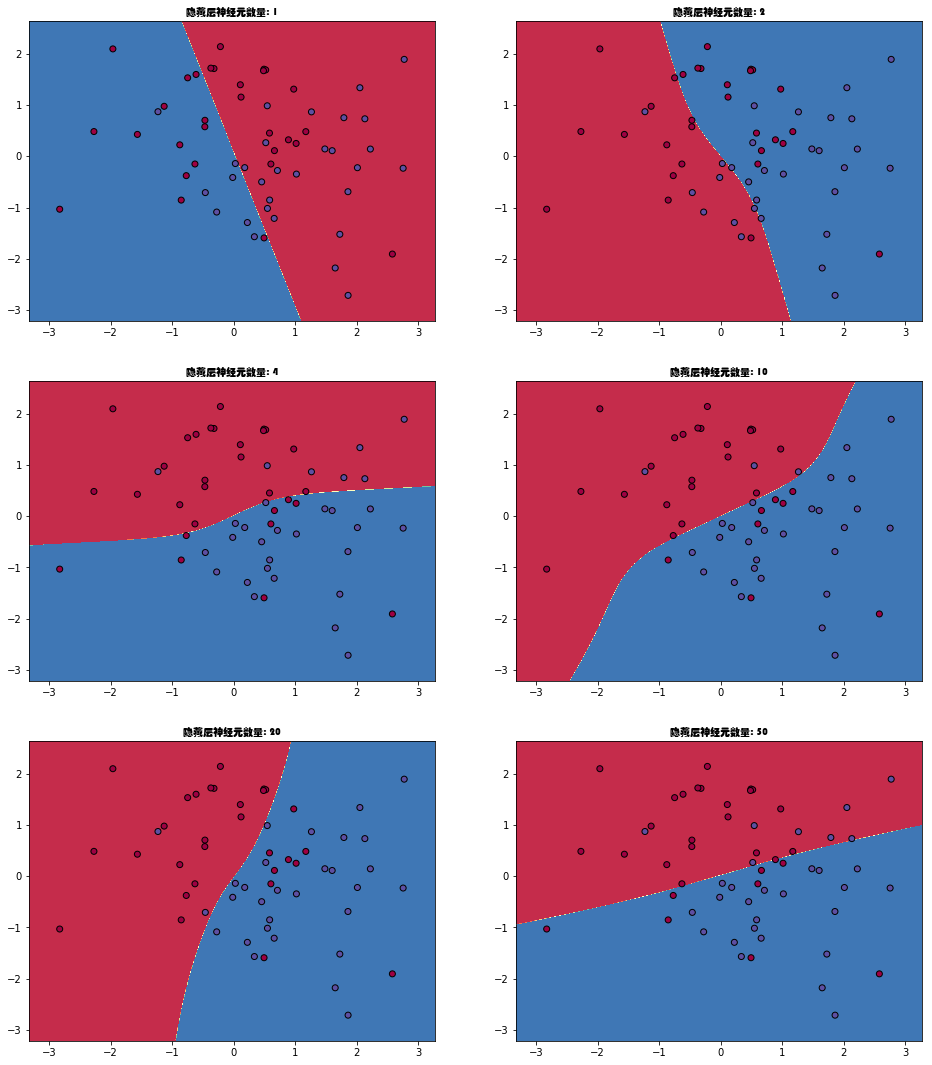

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 11 17:35:20 2018

@author: hcc
"""

#coding:utf-8
import h5py
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
font = fm.FontProperties(fname='C:\Windows\Fonts\STHUPO.TTF')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

class NeuralNetwork:
    def __init__(self, layers_strcuture, print_cost = False):
        self.layers_strcuture = layers_strcuture
        self.layers_num = len(layers_strcuture)
        # 除掉输入层的网络层数，因为其他层才是真正的神经元层
        self.param_layers_num = self.layers_num - 1
        self.learning_rate = 0.0618
        self.num_iterations = 2000
        self.x = None
        self.y = None
        self.w = dict()
        self.b = dict()
        self.costs = []
        self.print_cost = print_cost
        self.init_w_and_b()
    def set_learning_rate(self, learning_rate):
        """设置学习率"""
        self.learning_rate = learning_rate
    def set_num_iterations(self, num_iterations):
        """设置迭代次数"""
        self.num_iterations = num_iterations
    def set_xy(self, input, expected_output):
        """设置神经网络的输入和期望的输出"""
        self.x = input
        self.y = expected_output
    def init_w_and_b(self):
        """
        函数:
            初始化神经网络所有参数
        输入:
            layers_strcuture: 神经网络的结构，例如[2,4,3,1]，4层结构:
                第0层输入层接收2个数据，第1层隐藏层4个神经元，第2层隐藏层3个神经元，第3层输出层1个神经元
        返回: 神经网络各层参数的索引表，用来定位权值 wᵢ  和偏置 bᵢ，i为网络层编号
        """
        np.random.seed(3)
        # 当前神经元层的权值为 n_i x n_(i-1)的矩阵，i为网络层编号，n为下标i代表的网络层的节点个数
        # 例如[2,4,3,1]，4层结构：第0层输入层为2，那么第1层隐藏层神经元个数为4
        # 那么第1层的权值w是一个 4x2 的矩阵，如：
        #    w1 = array([ [-0.96927756, -0.59273074],
        #                 [ 0.58227367,  0.45993021],
        #                 [-0.02270222,  0.13577601],
        #                 [-0.07912066, -1.49802751] ])
        # 当前层的偏置一般给0就行，偏置是个1xnᵢ的矩阵，nᵢ为第i层的节点个数，例如第1层为4个节点，那么：
        #    b1 = array([ 0.,  0.,  0.,  0.])
        for l in range(1, self.layers_num):
            self.w["w" + str(l)] = np.random.randn(self.layers_strcuture[l], self.layers_strcuture[l-1])/np.sqrt(self.layers_strcuture[l-1])
            self.b["b" + str(l)] = np.zeros((self.layers_strcuture[l], 1))
        return self.w, self.b
    def layer_activation_forward(self, x, w, b, activation_choose):
        """
        函数：
            网络层的正向传播
        输入：
            x: 当前网络层输入（即上一层的输出），一般是所有训练数据，即输入矩阵
            w: 当前网络层的权值矩阵
            b: 当前网络层的偏置矩阵
            activation_choose: 选择激活函数 "sigmoid", "relu", "tanh"
        返回:
            output: 网络层的激活输出
            cache: 缓存该网络层的信息，供后续使用： (x, w, b, input_sum) -> cache
     """
        # 对输入求加权和，见式（3.1）
        input_sum = np.dot(w, x) + b
        # 对输入加权和进行激活输出
        # ",_"表示output被赋值后不是元组类型
        output, _ = activated(activation_choose, input_sum)
        return output, (x, w, b, input_sum)
    def forward_propagation(self, x):
        """
        函数:
            神经网络的正向传播
        输入:
        返回:
            output: 正向传播完成后的输出层的输出
            caches: 正向传播过程中缓存每一个网络层的信息： (x, w, b, input_sum),... -> caches
        """
        caches = []
        #作为输入层，输出 = 输入
        output_prev = x
        #第0层为输入层，只负责观察到输入的数据，并不需要处理，正向传播从第1层开始，一直到输出层输出为止
        # range(1, n) => [1, 2, ..., n-1]
        L = self.param_layers_num
        for l in range(1, L):
            # 当前网络层的输入来自前一层的输出
            input_cur = output_prev
            output_prev, cache = self.layer_activation_forward(input_cur, self.w["w"+ str(l)], self.b["b" + str(l)], "tanh")
            caches.append(cache)
        output, cache = self.layer_activation_forward(output_prev, self.w["w" + str(L)], self.b["b" + str(L)], "sigmoid")
        caches.append(cache)
        return output, caches
    def show_caches(self, caches):
        """显示网络层的缓存参数信息"""
        i = 1
        for cache in caches:
            print("%dtd Layer" % i)
            print(" input: %s" % cache[0])
            print(" w: %s" % cache[1])
            print(" b: %s" % cache[2])
            print(" input_sum: %s" % cache[3])
            print("----------")
            i += 1
    def compute_error(self, output):
        """
        函数:
            计算档次迭代的输出总误差
        输入:
        返回:
        """
        m = self.y.shape[1]
        # 计算误差，见式(3.5): E = Σ1/2(期望输出-实际输出)²
        #error = np.sum(0.5 * (self.y - output) ** 2) / m
        # 交叉熵作为误差函数
        error =  -np.sum(np.multiply(np.log(output),self.y) + np.multiply(np.log(1 - output), 1 - self.y)) / m
        error = np.squeeze(error)
        return error
    def layer_activation_backward(self, derror_wrt_output, cache, activation_choose):
        """
            函数:
                网络层的反向传播
            输入:
                derror_wrt_output: 误差关于输出的偏导
                cache: 网络层的缓存信息 (x, w, b, input_sum)
                activation_choose: 选择激活函数 "sigmoid", "relu", "tanh"
            返回: 梯度信息，即
                derror_wrt_output_prev: 反向传播到上一层的误差关于输出的梯度
                derror_wrt_dw: 误差关于权值的梯度
                derror_wrt_db: 误差关于偏置的梯度
        """
        input, w, b, input_sum = cache
        output_prev = input     # 上一层的输出 = 当前层的输入; 注意是'输入'不是输入的加权和（input_sum）
        m = output_prev.shape[1]      # m是输入的样本数量，我们要取均值，所以下面的求值要除以m
        # 实现式（3.13）-> 误差关于权值w的偏导数
        print("")
        derror_wrt_dinput = activated_back_propagation(activation_choose, derror_wrt_output, input_sum)
        derror_wrt_dw = np.dot(derror_wrt_dinput, output_prev.T) / m
        # 实现式 （3.37）-> 误差关于偏置b的偏导数
        derror_wrt_db = np.sum(derror_wrt_dinput, axis=1, keepdims=True)/m
        # 为反向传播到上一层提供误差传递，见式（3.33）的 （Σδ·w） 部分
        derror_wrt_output_prev = np.dot(w.T, derror_wrt_dinput)
        return derror_wrt_output_prev, derror_wrt_dw, derror_wrt_db
    def back_propagation(self, output, caches):
        """
        函数:
            神经网络的反向传播
        输入:
            output：神经网络输
            caches：所有网络层（输入层不算）的缓存参数信息  [(x, w, b, input_sum), ...]
        返回:
            grads: 返回当前迭代的梯度信息
        """
        grads = {}
        L = self.param_layers_num #
        output = output.reshape(output.shape)  # 把输出层输出输出重构成和期望输出一样的结构
        expected_output = self.y
        # 见式(3.8)
        #derror_wrt_output = -(expected_output - output)
        # 交叉熵作为误差函数
        derror_wrt_output = - (np.divide(expected_output, output) - np.divide(1 - expected_output, 1 - output))
        # 反向传播：输出层 -> 隐藏层，得到梯度：见式(3.9), (3.13), (3.16)
        current_cache = caches[L - 1] # 取最后一层,即输出层的参数信息
        grads["derror_wrt_output" + str(L)], grads["derror_wrt_dw" + str(L)], grads["derror_wrt_db" + str(L)] = \
            self.layer_activation_backward(derror_wrt_output, current_cache, "sigmoid")
        # 反向传播：隐藏层 -> 隐藏层，得到梯度：见式 (3.33)的(Σδ·w), (3.33), (3.36)
        for l in reversed(range(L - 1)):
            current_cache = caches[l]
            derror_wrt_output_prev_temp, derror_wrt_dw_temp, derror_wrt_db_temp = \
                self.layer_activation_backward(grads["derror_wrt_output" + str(l + 2)], current_cache, "tanh")
            grads["derror_wrt_output" + str(l + 1)] = derror_wrt_output_prev_temp
            grads["derror_wrt_dw" + str(l + 1)] = derror_wrt_dw_temp
            grads["derror_wrt_db" + str(l + 1)] = derror_wrt_db_temp
        return grads
    def update_w_and_b(self, grads):
        """
        函数:
            根据梯度信息更新w，b
        输入:
            grads：当前迭代的梯度信息
        返回:
        """
        # 权值w和偏置b的更新，见式:（3.17),(3.19)
        for l in range(self.param_layers_num):
            self.w["w" + str(l + 1)] = self.w["w" + str(l + 1)] - self.learning_rate * grads["derror_wrt_dw" + str(l + 1)]
            self.b["b" + str(l + 1)] = self.b["b" + str(l + 1)] - self.learning_rate * grads["derror_wrt_db" + str(l + 1)]
    def training_modle(self):
        """训练神经网络模型"""
        np.random.seed(5)
        for i in range(0, self.num_iterations):
            # 正向传播，得到网络输出，以及每一层的参数信息
            output, caches = self.forward_propagation(self.x)
            # 计算网络输出误差
            cost = self.compute_error(output)
            # 反向传播，得到梯度信息
            grads = self.back_propagation(output, caches)
            # 根据梯度信息，更新权值w和偏置b
            self.update_w_and_b(grads)
            # 当次迭代结束，打印误差信息
            if self.print_cost and i % 1000 == 0:
                print ("Cost after iteration %i: %f" % (i, cost))
            if self.print_cost and i % 1000 == 0:
                self.costs.append(cost)
        # 模型训练完后显示误差曲线
        if False:
            plt.plot(np.squeeze(self.costs))
            plt.ylabel(u'神经网络误差', fontproperties = font)
            plt.xlabel(u'迭代次数 (*100)', fontproperties = font)
            plt.title(u"学习率 =" + str(self.learning_rate), fontproperties = font)
            plt.show()
        return self.w, self.b
    def predict_by_modle(self, x):
        """使用训练好的模型（即最后求得w，b参数）来决策输入的样本的结果"""
        output, _ = self.forward_propagation(x.T)
        
        output = output.T
        result = output / np.sum(output, axis=1, keepdims=True)
        return np.argmax(result, axis=1)
def sigmoid(input_sum):
    """
    函数：
        激活函数Sigmoid
    输入：
        input_sum: 输入，即神经元的加权和
    返回：
        output: 激活后的输出
        input_sum: 把输入缓存起来返回
    """
    output = 1.0/(1+np.exp(-input_sum))
    return output, input_sum
def sigmoid_back_propagation(derror_wrt_output, input_sum):
    """
    函数：
        误差关于神经元输入的偏导: dE／dIn = dE/dOut * dOut/dIn  参照式（3.6）
        其中： dOut/dIn 就是激活函数的导数 dy=y(1 - y)，见式（3.9）
              dE/dOut 误差对神经元输出的偏导，见式（3.8）
    输入：
        derror_wrt_output：误差关于神经元输出的偏导: dE/dyⱼ = 1/2(d(expect_to_output - output)**2/doutput) = -(expect_to_output - output)
        input_sum: 输入加权和
    返回：
        derror_wrt_dinputs: 误差关于输入的偏导，见式（3.13）
    """
    output = 1.0/(1 + np.exp(- input_sum))
    doutput_wrt_dinput = output * (1 - output)
    derror_wrt_dinput =  derror_wrt_output * doutput_wrt_dinput
    return derror_wrt_dinput
def relu(input_sum):
    """
        函数：
            激活函数ReLU
        输入：
            input_sum: 输入，即神经元的加权和
        返回：
            outputs: 激活后的输出
            input_sum: 把输入缓存起来返回
    """
    output = np.maximum(0, input_sum)
    return output, input_sum
def relu_back_propagation(derror_wrt_output, input_sum):
    """
        函数：
            误差关于神经元输入的偏导: dE／dIn = dE/dOut * dOut/dIn
            其中： dOut/dIn 就是激活函数的导数
                  dE/dOut 误差对神经元输出的偏导
        输入：
            derror_wrt_output：误差关于神经元输出的偏导
            input_sum: 输入加权和
        返回：
            derror_wrt_dinputs: 误差关于输入的偏导
    """
    derror_wrt_dinputs = np.array(derror_wrt_output, copy=True)
    derror_wrt_dinputs[input_sum <= 0] = 0
    return derror_wrt_dinputs
def tanh(input_sum):
    """
    函数：
        激活函数 tanh
    输入：
        input_sum: 输入，即神经元的加权和
    返回：
        output: 激活后的输出
        input_sum: 把输入缓存起来返回
    """
    output = np.tanh(input_sum)
    return output, input_sum
def tanh_back_propagation(derror_wrt_output, input_sum):
    """
    函数：
        误差关于神经元输入的偏导: dE／dIn = dE/dOut * dOut/dIn
        其中： dOut/dIn 就是激活函数的导数 tanh'(x) = 1 - x²
              dE/dOut 误差对神经元输出的偏导
    输入：
        derror_wrt_output：误差关于神经元输出的偏导: dE/dyⱼ = 1/2(d(expect_to_output - output)**2/doutput) = -(expect_to_output - output)
        input_sum: 输入加权和
    返回：
        derror_wrt_dinputs: 误差关于输入的偏导
    """
    output = np.tanh(input_sum)
    doutput_wrt_dinput = 1 - np.power(output, 2)
    derror_wrt_dinput =  derror_wrt_output * doutput_wrt_dinput
    return derror_wrt_dinput
def activated(activation_choose, input):
    """把正向激活包装一下"""
    if activation_choose == "sigmoid":
        return sigmoid(input)
    elif activation_choose == "relu":
        return relu(input)
    elif activation_choose == "tanh":
        return tanh(input)
    return sigmoid(input)
def activated_back_propagation(activation_choose, derror_wrt_output, output):
    """包装反向激活传播"""
    if activation_choose == "sigmoid":
        return sigmoid_back_propagation(derror_wrt_output, output)
    elif activation_choose == "relu":
        return relu_back_propagation(derror_wrt_output, output)
    elif activation_choose == "tanh":
        return tanh_back_propagation(derror_wrt_output, output)
    return sigmoid_back_propagation(derror_wrt_output, output)
def plot_decision_boundary(xy, colors, pred_func):
    # xy是坐标点的集合，把集合的范围算出来
    # 加减0.5相当于扩大画布的范围，不然画出来的图坐标点会落在图的边缘，逼死强迫症患者
    x_min, x_max = xy[:, 0].min() - 0.5, xy[:, 0].max() + 0.5
    y_min, y_max = xy[:, 1].min() - 0.5, xy[:, 1].max() + 0.5
    # 以h为分辨率，生成采样点的网格，就像一张网覆盖所有颜色点
    h = .01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # 把网格点集合作为输入到模型，也就是预测这个采样点是什么颜色的点，从而得到一个决策面
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 利用等高线，把预测的结果画出来，效果上就是画出红蓝点的分界线
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    # 训练用的红蓝点点也画出来
    plt.scatter(xy[:, 0], xy[:, 1], c=colors, marker='o', cmap=plt.cm.Spectral, edgecolors='black')
if __name__ == "__main__":
    plt.figure(figsize=(16, 32))
    # 用sklearn的数据样本集，产生2种颜色的坐标点，noise是噪声系数，噪声越大，2种颜色的点分布越凌乱
    xy, colors = sklearn.datasets.make_moons(60, noise=1.0)
     
    # 因为点的颜色是1bit，我们设计一个神经网络，输出层有2个神经元。
    # 标定输出[1,0]为红色点，输出[0,1]为蓝色点
    expect_output = []
    for c in colors:
        if c == 1:
            expect_output.append([0,1])
        else:
            expect_output.append([1,0])
    print(np.shape(expect_output))
    expect_output = np.array(expect_output).T
    print(np.shape(expect_output))
    print("expect_output" ,expect_output)
    
    # 设计3层网络，改变隐藏层神经元的个数，观察神经网络分类红蓝点的效果
    hidden_layer_neuron_num_list = [1,2,4,10,20,50]
    for i, hidden_layer_neuron_num in enumerate(hidden_layer_neuron_num_list):
        plt.subplot(5, 2, i + 1)
        plt.title(u'隐藏层神经元数量: %d' % hidden_layer_neuron_num, fontproperties = font)
        nn = NeuralNetwork([2, hidden_layer_neuron_num, 2], True)
        # 输出和输入层都是2个节点，所以输入和输出的数据集合都要是 nx2的矩阵
        nn.set_xy(xy.T, expect_output)
        nn.set_num_iterations(3)
        nn.set_learning_rate(0.1)
        w, b = nn.training_modle()
        plot_decision_boundary(xy, colors, nn.predict_by_modle)
    plt.show()

参考：https://zhuanlan.zhihu.com/p/38006693

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 11 17:35:20 2018

@author: hcc
"""

#coding:utf-8
import h5py
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
font = fm.FontProperties(fname='C:\Windows\Fonts\STXIHEI.TTF')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
def sigmoid(input_sum):
    output = 1.0/(1+np.exp(-input_sum))
    return output, input_sum
def sigmoid_back_propagation(derror_wrt_output, input_sum):
    """
    函数：
        误差关于神经元输入的偏导: dE／dIn = dE/dOut * dOut/dIn  参照式（3.6）
        其中： dOut/dIn 就是激活函数的导数 dy=y(1 - y)，见式（3.9）
              dE/dOut 误差对神经元输出的偏导，见式（3.8）
    输入：
        derror_wrt_output：误差关于神经元输出的偏导: dE/dyⱼ = 1/2(d(expect_to_output - output)**2/doutput) = -(expect_to_output - output)
        input_sum: 输入加权和
    返回：
        derror_wrt_dinputs: 误差关于输入的偏导，见式（3.13）
    """
    output = 1.0/(1 + np.exp(- input_sum))
    doutput_wrt_dinput = output * (1 - output)
    derror_wrt_dinput =  derror_wrt_output * doutput_wrt_dinput
    return derror_wrt_dinput
def relu(input_sum):
    output = np.maximum(0, input_sum)
    return output, input_sum
def relu_back_propagation(derror_wrt_output, input_sum):
    derror_wrt_dinputs = np.array(derror_wrt_output, copy=True)
    derror_wrt_dinputs[input_sum <= 0] = 0
    return derror_wrt_dinputs
def tanh(input_sum):
    output = np.tanh(input_sum)
    return output, input_sum
def tanh_back_propagation(derror_wrt_output, input_sum):
    
    output = np.tanh(input_sum)
    doutput_wrt_dinput = 1 - np.power(output, 2)
    derror_wrt_dinput =  derror_wrt_output * doutput_wrt_dinput
    return derror_wrt_dinput
def activated(activation_choose, input):
    """把正向激活包装一下"""
    if activation_choose == "sigmoid":
        return sigmoid(input)
    elif activation_choose == "relu":
        return relu(input)
    elif activation_choose == "tanh":
        return tanh(input)
    return sigmoid(input)
def activated_back_propagation(activation_choose, derror_wrt_output, output):
    """包装反向激活传播"""
    if activation_choose == "sigmoid":
        return sigmoid_back_propagation(derror_wrt_output, output)
    elif activation_choose == "relu":
        return relu_back_propagation(derror_wrt_output, output)
    elif activation_choose == "tanh":
        return tanh_back_propagation(derror_wrt_output, output)
    return sigmoid_back_propagation(derror_wrt_output, output)
class NeuralNetwork:
    def __init__(self, layers_strcuture, print_cost = False):
        self.layers_strcuture = layers_strcuture
        self.layers_num = len(layers_strcuture)
        # 除掉输入层的网络层数，因为其他层才是真正的神经元层
        self.param_layers_num = self.layers_num - 1
        self.learning_rate = 0.0618
        self.num_iterations = 2000
        self.x = None
        self.y = None
        self.w = dict()
        self.b = dict()
        self.costs = []
        self.print_cost = print_cost
        self.init_w_and_b()
    def set_learning_rate(self, learning_rate):
        """设置学习率"""
        self.learning_rate = learning_rate
    def set_num_iterations(self, num_iterations):
        """设置迭代次数"""
        self.num_iterations = num_iterations
    def set_xy(self, input, expected_output):
        """设置神经网络的输入和期望的输出"""
        self.x = input
        self.y = expected_output
        print("init x,y-------------set_xy--------------:\n")
        print("x:\n",self.x)
        print("y:\n",self.y)
    def init_w_and_b(self):
        print("--------------------------init_w_and_b----------------------------------\n")
        print("layers_num",self.layers_num)
        print("layers_strcuture:",self.layers_strcuture)
        np.random.seed(3)
        for l in range(1, self.layers_num):
           
            self.w["w" + str(l)] = np.random.randn(self.layers_strcuture[l], self.layers_strcuture[l-1])/np.sqrt(self.layers_strcuture[l-1]) 
            self.b["b" + str(l)] = np.zeros((self.layers_strcuture[l], 1))
           
        print("after init w,b----------------:\n")
        print("w:\n",self.w)
        print("b:\n" ,self.b)
        print("------------------------------------------------------------\n")
        return self.w, self.b
    def layer_activation_forward(self, x, w, b, activation_choose):
        print("---------------------------layer_activation_forward---------------------------------\n")
        print("layer_activation_forward :\n")
        # 对输入求加权和，见式（5.1）
        input_sum = np.dot(w, x) + b
        
        print("shape of W:",np.shape(w))
        print("shape of X:",np.shape(x))
        print("w:\n",w)
        print("x:\n",x)
        print("b:\n",b)
        print("input_sum:\n",input_sum)
        # 对输入加权和进行激活输出
        output, _ = activated(activation_choose, input_sum)   
        print("------------------------------------------------------------\n")
        return output, (x, w, b, input_sum)
    def forward_propagation(self, x):
        print("-----------------------------forward_propagation-------------------------------\n")
        caches = []
        #作为输入层，输出 = 输入
        output_prev = x
        #第0层为输入层，只负责观察到输入的数据，并不需要处理，正向传播从第1层开始，一直到输出层输出为止
        # range(1, n) => [1, 2, ..., n-1]
        L = self.param_layers_num
        for l in range(1, L):
            # 当前网络层的输入来自前一层的输出
            input_cur = output_prev
            output_prev, cache = self.layer_activation_forward(input_cur, self.w["w"+ str(l)], self.b["b" + str(l)], "tanh")
            print("output_prev:\n",output_prev)
            print("cache:\n",cache)
            caches.append(cache)
        output, cache = self.layer_activation_forward(output_prev, self.w["w" + str(L)], self.b["b" + str(L)], "sigmoid")
        caches.append(cache)
        print("forward_propagation cache:\n",cache)
        print("output:\n",output)
        print("------------------------------------------------------------\n")
        return output, caches
    def show_caches(self, caches):
        print("-----------------------------show_caches-------------------------------\n")
        """显示网络层的缓存参数信息"""
        i = 1
        for cache in caches:
            print("%dtd Layer" % i)
            print(" input: %s" % cache[0])
            print(" w: %s" % cache[1])
            print(" b: %s" % cache[2])
            print(" input_sum: %s" % cache[3])
            print("---------------")
            i += 1
        print("------------------------------------------------------------\n")
    def compute_error(self, output):
        print("---------------------------compute_error---------------------------------\n")
        m = self.y.shape[1]
         # 计算误差，见式(3.5): E = Σ1/2(期望输出-实际输出)²
        #error = np.sum(0.5 * (self.y - output) ** 2) / m
        # 交叉熵作为误差函数
        error =  -np.sum(np.multiply(np.log(output),self.y) + np.multiply(np.log(1 - output), 1 - self.y)) / m
        print("error-befoer:\n",error)
        error = np.squeeze(error)
        print("error:\n",error)
        print("------------------------------------------------------------\n")
        return error
    def layer_activation_backward(self, derror_wrt_output, cache, activation_choose):
 
        print("---------------------------layer_activation_backward---------------------------------\n")
        input, w, b, input_sum = cache
        output_prev = input     # 上一层的输出 = 当前层的输入; 注意是'输入'不是输入的加权和（input_sum）
        m = output_prev.shape[1]      # m是输入的样本数量，我们要取均值，所以下面的求值要除以m
        # 实现式（3.13）-> 误差关于权值w的偏导数
        """
        #derror_wrt_output = -(expected_output - output)
        # 交叉熵作为误差函数
        #derror_wrt_output = - (np.divide(expected_output, output) - np.divide(1 - expected_output, 1 - output))
         output = 1.0/(1 + np.exp(- input_sum))
         doutput_wrt_dinput = output * (1 - output)
         derror_wrt_dinput =  derror_wrt_output * doutput_wrt_dinput
         derror_wrt_dinput = (Cost)output(1-output)  //Cost = derror_wrt_output
          
        """
        derror_wrt_dinput = activated_back_propagation(activation_choose, derror_wrt_output, input_sum)
       
        print("shape of derror_wrt_dinput:\n", np.shape(derror_wrt_dinput))
        print("derror_wrt_dinput:\n",derror_wrt_dinput)
        print("shape of output_prev:\n",np.shape(output_prev.T))
       
        derror_wrt_dw = np.dot(derror_wrt_dinput, output_prev.T) / m
        
        print("derror_wrt_dw:\n",derror_wrt_dw)
        
          # 实现式 （3.37）-> 误差关于偏置b的偏导数
        derror_wrt_db = np.sum(derror_wrt_dinput, axis=1, keepdims=True)/m  #axis = 1按列，keepims = True，压缩，即按列压缩，由2行8列压缩为2行1列再取平均
        print("shape of derror_wrt_db",np.shape(derror_wrt_db))
        # 为反向传播到上一层提供误差传递，见式（3.33）的 （Σδ·w） 部分
        print("shape of w:",np.shape(w))
        print("shape of derror_wrt_dinput:",np.shape(derror_wrt_dinput))
        derror_wrt_output_prev = np.dot(w.T, derror_wrt_dinput)
        
        print("w T:\n", w.T)
        print("derror_wrt_output_prev:\n",derror_wrt_output_prev)
        print("------------------------------------------------------------\n")
        return derror_wrt_output_prev, derror_wrt_dw, derror_wrt_db
    def back_propagation(self, output, caches):
        """
        函数:
            神经网络的反向传播
        输入:
            output：神经网络输
            caches：所有网络层（输入层不算）的缓存参数信息  [(x, w, b, input_sum), ...]
        返回:
            grads: 返回当前迭代的梯度信息
        """
        print("------------------------------back_propagation------------------------------\n")
        grads = {}
        L = self.param_layers_num #
        print("Layers_num:",L)
        print("shape of output:",np.shape(output))
        
        output = output.reshape(output.shape)  # 把输出层输出输出重构成和期望输出一样的结构
        print("after shape of output:",np.shape(output))
        print("output:\n",output)
        expected_output = self.y
        print("expected_output:\n:",expected_output)
         # 见式(3.8)
        #derror_wrt_output = -(expected_output - output)
        # 交叉熵作为误差函数
        derror_wrt_output = - (np.divide(expected_output, output) - np.divide(1 - expected_output, 1 - output))
        print("derror_wrt_output:\n",derror_wrt_output)
        # 反向传播：输出层 -> 隐藏层，得到梯度：见式(3.9), (3.13), (3.16)
        current_cache = caches[L - 1] # 取最后一层,即输出层的参数信息
        grads["derror_wrt_output" + str(L)], grads["derror_wrt_dw" + str(L)], grads["derror_wrt_db" + str(L)] = \
            self.layer_activation_backward(derror_wrt_output, current_cache, "sigmoid")
        print("grads------------------:\n",grads)
        # 反向传播：隐藏层 -> 隐藏层，得到梯度：见式 (3.33)的(Σδ·w), (3.33), (3.36)
        for l in reversed(range(L - 1)):
            print("l is:",l)
            current_cache = caches[l]
            derror_wrt_output_prev_temp, derror_wrt_dw_temp, derror_wrt_db_temp = \
                self.layer_activation_backward(grads["derror_wrt_output" + str(l + 2)], current_cache, "tanh")
            grads["derror_wrt_output" + str(l + 1)] = derror_wrt_output_prev_temp
            grads["derror_wrt_dw" + str(l + 1)] = derror_wrt_dw_temp
            grads["derror_wrt_db" + str(l + 1)] = derror_wrt_db_temp
        print("after back_propagation grads:------------\n",grads)
        print("------------------------------------------------------------\n")
        return grads
    def update_w_and_b(self, grads):
        """
        函数:
            根据梯度信息更新w，b
        输入:
            grads：当前迭代的梯度信息
        返回:
        """
        print("-----------------------------update_w_and_b-------------------------------\n")
        # 权值w和偏置b的更新，见式:（3.17),(3.19)
        for l in range(self.param_layers_num):
            self.w["w" + str(l + 1)] = self.w["w" + str(l + 1)] - self.learning_rate * grads["derror_wrt_dw" + str(l + 1)]
            self.b["b" + str(l + 1)] = self.b["b" + str(l + 1)] - self.learning_rate * grads["derror_wrt_db" + str(l + 1)]
        print("update_w_b:\n")
        print("w:\n",self.w)
        print("b:\n",self.b)
        print("------------------------------------------------------------\n")
    def training_modle(self):
        """训练神经网络模型"""
        np.random.seed(5)
        for i in range(0, self.num_iterations):
            # 正向传播，得到网络输出，以及每一层的参数信息
            #caches = (x, w, b, input_sum)
            print("------------------------------training_modle------------------------------\n")
            print("begin _training:")
            print("x:\n",self.x)
            output, caches = self.forward_propagation(self.x)
            print("i:%d ,output:%s\n"%(i,output))
            print("caches:\n",caches)
            # 计算网络输出误差
            cost = self.compute_error(output)
            # 反向传播，得到梯度信息
            grads = self.back_propagation(output, caches)
            # 根据梯度信息，更新权值w和偏置b
            self.update_w_and_b(grads)
            # 当次迭代结束，打印误差信息
            if self.print_cost and i % 1000 == 0:
                print ("Cost after iteration %i: %f" % (i, cost))
            if self.print_cost and i % 1000 == 0:
                self.costs.append(cost)
        # 模型训练完后显示误差曲线
        if False:
            plt.plot(np.squeeze(self.costs))
            plt.ylabel(u'神经网络误差', fontproperties = font)
            plt.xlabel(u'迭代次数 (*100)', fontproperties = font)
            plt.title(u"学习率 =" + str(self.learning_rate), fontproperties = font)
            plt.show()
        print("------------------------------------------------------------\n")
        return self.w, self.b
    def predict_by_modle(self, x):
        """使用训练好的模型（即最后求得w，b参数）来决策输入的样本的结果"""
        output, _ = self.forward_propagation(x.T)
        output = output.T
        result = output / np.sum(output, axis=1, keepdims=True)
        return np.argmax(result, axis=1)
def plot_decision_boundary(xy, colors, pred_func):
    # xy是坐标点的集合，把集合的范围算出来
    # 加减0.5相当于扩大画布的范围，不然画出来的图坐标点会落在图的边缘，逼死强迫症患者
    x_min, x_max = xy[:, 0].min() - 0.5, xy[:, 0].max() + 0.5
    y_min, y_max = xy[:, 1].min() - 0.5, xy[:, 1].max() + 0.5
    # 以h为分辨率，生成采样点的网格，就像一张网覆盖所有颜色点
    h = .01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # 把网格点集合作为输入到模型，也就是预测这个采样点是什么颜色的点，从而得到一个决策面
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 利用等高线，把预测的结果画出来，效果上就是画出红蓝点的分界线
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    # 训练用的红蓝点点也画出来
    plt.scatter(xy[:, 0], xy[:, 1], c=colors, marker='o', cmap=plt.cm.Spectral, edgecolors='black')
if __name__ == "__main__":
    plt.figure(figsize=(16, 32))
    print("------------------------------------------------------------\n")
    # 用sklearn的数据样本集，产生2种颜色的坐标点，noise是噪声系数，噪声越大，2种颜色的点分布越凌乱
    xy, colors = sklearn.datasets.make_moons(8, noise=1.0)
    print("xy:\n",xy.T)
    print("colors:\n",colors)
    # 因为点的颜色是1bit，我们设计一个神经网络，输出层有2个神经元。
    # 标定输出[1,0]为红色点，输出[0,1]为蓝色点
    expect_output = []
    for c in colors:
        if c == 1:
            expect_output.append([0,1])
        else:
            expect_output.append([1,0])
    expect_output = np.array(expect_output).T
    print("expect_output:\n",expect_output)
    # 设计3层网络，改变隐藏层神经元的个数，观察神经网络分类红蓝点的效果
    hidden_layer_neuron_num_list = [4]
    for i, hidden_layer_neuron_num in enumerate(hidden_layer_neuron_num_list):
        plt.subplot(5, 2, i + 1)
        plt.title(u'隐藏层神经元数量: %d' % hidden_layer_neuron_num, fontproperties = font)
        nn = NeuralNetwork([2, hidden_layer_neuron_num, 2], True)
        # 输出和输入层都是2个节点，所以输入和输出的数据集合都要是 nx2的矩阵
        nn.set_xy(xy.T, expect_output)
        nn.set_num_iterations(1)
        nn.set_learning_rate(0.1)
        w, b = nn.training_modle()
        plot_decision_boundary(xy, colors, nn.predict_by_modle)
    print("------------------------------------------------------------\n")
    plt.show()